<h1>Preparing Data</h1>

In [1]:
import pandas as pd

In [3]:
dataset = pd.read_excel('/content/4A_TB_cleaned.xlsx')

In [4]:
dataset.head()

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MARITAL STATUS,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
1,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
2,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
3,GI,1861416,M,30,COU,Nakasongola,"ISS,Abdominal TB,,",IMPROVED,5,Abdominal_TB,2,November,Tuesday,2010,6,CENTRAL,"ISS,,",1
4,GI,1868011,F,46,COU,Kampala,"ISS Stage I&II,Disseminated TB,,",IMPROVED,3,Disseminated TB,2,December,Monday,2010,4,CENTRAL,"ISS Stage I&II,,",1


In [5]:
dataset = pd.concat([dataset] * 4, ignore_index=True)

In [6]:
dataset.shape

(65472, 18)

In [7]:
num_weeks = 4

# Converting duration to whole weeks (assuming 7 days per week)
dataset['Duration (weeks)'] = dataset['DURATION'].apply(lambda x: int(x // 7 + (x % 7 > 0)))

# function to identify the last week of appearance
def get_last_week(row):
  if row['OUT COME'] != 'DIED':
    return min(row['Duration (weeks)'], num_weeks)
  else:
    return 0

dataset['Last Week'] = dataset.apply(get_last_week, axis=1)

In [8]:
for week in range(1, num_weeks + 1):
  # Checking for non-deaths and appearance within the week
  mask = (dataset['OUT COME'] != 'DIED') & (dataset['Last Week'] >= week)
  dataset.loc[mask, f'Week_{week}'] = 0


  #Checking for deaths within the week and below
  dead_mask = (dataset['OUT COME'] == 'DIED') & ((dataset['DURATION'] / 7) <= week)
  dataset.loc[dead_mask, f'Week_{week}'] = 1

  dead_later_mask = (dataset['OUT COME'] == 'DIED') & ((dataset['DURATION'] / 7) > week)
  dataset.loc[dead_later_mask, f'Week_{week}'] = 0

dataset.drop('Last Week', axis=1, inplace=True)

In [9]:
dataset.sample(10)

,UNIT,IP NUMBER,SEX,AGE,RELIGION,DISTRICT OF RESIDENCE,WORKING DIAGNOSIS,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,...,YEAR OF ADMISSION,DURATION,REGION,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Duration (weeks),Week_1,Week_2,Week_3,Week_4
33853,IDF,1985719,F,43,ISLAM,WAKISO,"PTB,CHRONIC DIARRHOEA,ISS",DIED,13,PTB,...,2011,14,CENTRAL,"CHRONIC DIARRHOEA,ISS",2,2,0.0,1.0,1.0,1.0
62662,IDF,362130,F,31,ISLAM,MITYANA,"HIV,TB",DIED,0,Other TBs,...,2018,6,CENTRAL,HIV,1,1,1.0,1.0,1.0,1.0
12830,GI,340376,F,30,ISLAM,KAMPALA,"LIVER CIRRHOSIS,ASCITES,PTB",DIED,0,PTB,...,2017,9,CENTRAL,"LIVER CIRRHOSIS,ASCITES",2,2,0.0,1.0,1.0,1.0
63443,IDF,417692,F,40,CATHOLIC,KAMPALA,"HIV,ASPIRATION PNEUMONIA,PTB",DIED,0,PTB,...,2018,3,CENTRAL,"HIV,ASPIRATION PNEUMONIA",2,1,1.0,1.0,1.0,1.0
60379,IDM,214257,M,65,ISLAM,KAMPALA,"HIV,PTB,ORAL CANDIDIASIS",IMPROVED,1,PTB,...,2016,6,CENTRAL,"HIV,ORAL CANDIDIASIS",2,1,0.0,NaN,NaN,NaN
51925,IDM,2089366,M,50,CATHOLIC,MITYANA,"ISS,PTB,CCM",DIED,14,PTB,...,2012,15,CENTRAL,"ISS,CCM",2,3,0.0,0.0,1.0,1.0
32134,IDF,458757,F,19,OTHERS,KAMPALA,"PTB,PNEUMONIA",IMPROVED,0,PTB,...,2019,3,CENTRAL,PNEUMONIA,1,1,0.0,NaN,NaN,NaN
49258,GI,1927087,F,48,CATHOLIC,KAMPALA,"ISS,PTB,ORAL CANDIDIASI,",IMPROVED,9,PTB,...,2011,9,CENTRAL,"ISS,ORAL CANDIDIASI,",2,2,0.0,0.0,NaN,NaN
24729,IDF,70919,F,26,COU,NTUNGAMO,"HIV,ORAL CANDIDIASIS,PTB",IMPROVED,0,PTB,...,2015,5,WESTERN,"HIV,ORAL CANDIDIASIS",2,1,0.0,NaN,NaN,NaN
39793,IDM,367,M,50,CATHOLIC,WAKISO,"HIV,PTB",IMPROVED,0,PTB,...,2014,11,CENTRAL,HIV,1,2,0.0,0.0,NaN,NaN


In [10]:
#Deleting features which are not going to be used
features_to_remove = ['UNIT','DISTRICT OF RESIDENCE','WORKING DIAGNOSIS',
                      'ADDITIONAL WORKING DIAGNOSIS', 'MARITAL STATUS', 'IP NUMBER', 'Duration (weeks)']
dataset.drop(features_to_remove, axis = 1, inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65472 entries, 0 to 65471
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SEX                                     65472 non-null  object 
 1   AGE                                     65472 non-null  int64  
 2   RELIGION                                65472 non-null  object 
 3   OUT COME                                65472 non-null  object 
 4   NUMBER OF PREVIOUS ADMISSIONS           65472 non-null  int64  
 5   TB_type                                 65472 non-null  object 
 6   MONTH OF ADMISSION                      65472 non-null  object 
 7   DAY OF ADMISSION                        65472 non-null  object 
 8   YEAR OF ADMISSION                       65472 non-null  int64  
 9   DURATION                                65472 non-null  int64  
 10  REGION                                  65472 non-null  ob

In [12]:
dataset.head()

,SEX,AGE,RELIGION,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,MONTH OF ADMISSION,DAY OF ADMISSION,YEAR OF ADMISSION,DURATION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Week_1,Week_2,Week_3,Week_4
0,M,30,COU,IMPROVED,5,Abdominal_TB,November,Tuesday,2010,6,CENTRAL,1,0.0,NaN,NaN,NaN
1,M,30,COU,IMPROVED,5,Abdominal_TB,November,Tuesday,2010,6,CENTRAL,1,0.0,NaN,NaN,NaN
2,M,30,COU,IMPROVED,5,Abdominal_TB,November,Tuesday,2010,6,CENTRAL,1,0.0,NaN,NaN,NaN
3,M,30,COU,IMPROVED,5,Abdominal_TB,November,Tuesday,2010,6,CENTRAL,1,0.0,NaN,NaN,NaN
4,F,46,COU,IMPROVED,3,Disseminated TB,December,Monday,2010,4,CENTRAL,1,0.0,NaN,NaN,NaN


In [13]:
#dataset.to_excel('4A_TB_Prepared1.xlsx', index=False)

<h1>Data Preprocessing</h1>

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
dataset['MONTH OF ADMISSION'].unique()

array(['November', 'December', 'January', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October'],
      dtype=object)

In [16]:
dataset['DAY OF ADMISSION'].unique()

array(['Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Sunday', 'Friday',
       'Saturday'], dtype=object)

In [17]:
# dictionary for month encoding
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

# dictionary for day of week encoding
day_mapping = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday':76 }

dataset['Month of Admission'] = dataset['MONTH OF ADMISSION'].map(month_mapping)
dataset['Day of Admission'] = dataset['DAY OF ADMISSION'].map(day_mapping)

dataset.drop(columns=['MONTH OF ADMISSION', 'DAY OF ADMISSION'], inplace=True)


In [18]:
textual_columns = ['SEX', 'RELIGION', 'TB_type', 'REGION']

# Encoding textual data
encoder = LabelEncoder()
for col in textual_columns:
  dataset[col] = encoder.fit_transform(dataset[col])

In [19]:
dataset.head(20)

,SEX,AGE,RELIGION,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,YEAR OF ADMISSION,DURATION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Week_1,Week_2,Week_3,Week_4,Month of Admission,Day of Admission
0,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
1,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
2,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
3,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
4,0,46,1,IMPROVED,3,2,2010,4,0,1,0.0,NaN,NaN,NaN,12,2
5,0,46,1,IMPROVED,3,2,2010,4,0,1,0.0,NaN,NaN,NaN,12,2
6,0,46,1,IMPROVED,3,2,2010,4,0,1,0.0,NaN,NaN,NaN,12,2
7,0,46,1,IMPROVED,3,2,2010,4,0,1,0.0,NaN,NaN,NaN,12,2
8,1,80,2,IMPROVED,7,0,2010,8,0,2,0.0,0.0,NaN,NaN,12,4
9,1,80,2,IMPROVED,7,0,2010,8,0,2,0.0,0.0,NaN,NaN,12,4


In [20]:
dataset.shape

(65472, 16)

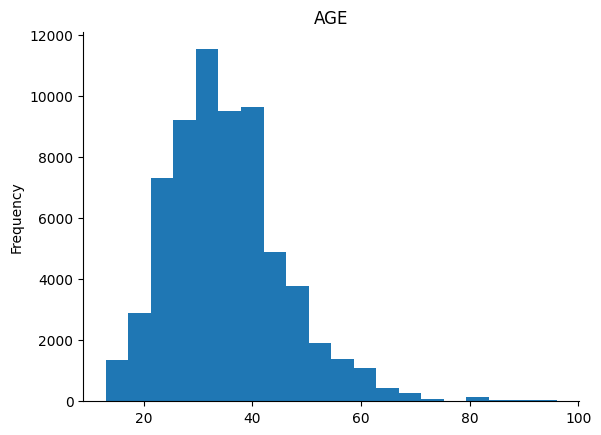

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns

dataset['AGE'].plot(kind='hist', bins=20, title='AGE')
plt.gca().spines[['top', 'right',]].set_visible(False)

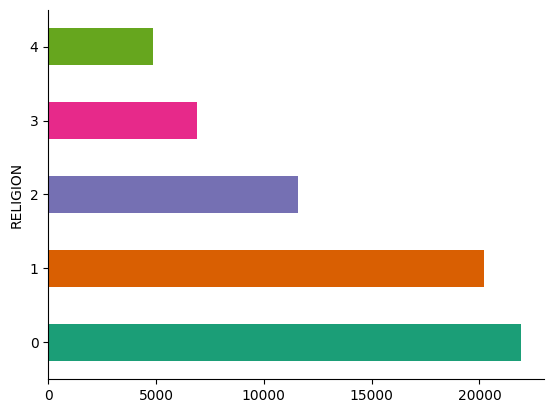

In [22]:
dataset.groupby('RELIGION').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

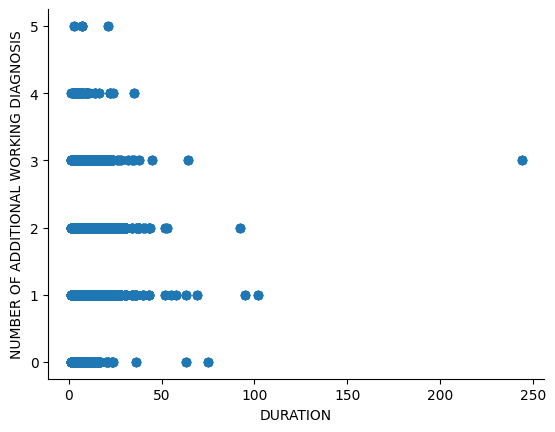

In [23]:
dataset.plot(kind='scatter', x='DURATION', y='NUMBER OF ADDITIONAL WORKING DIAGNOSIS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

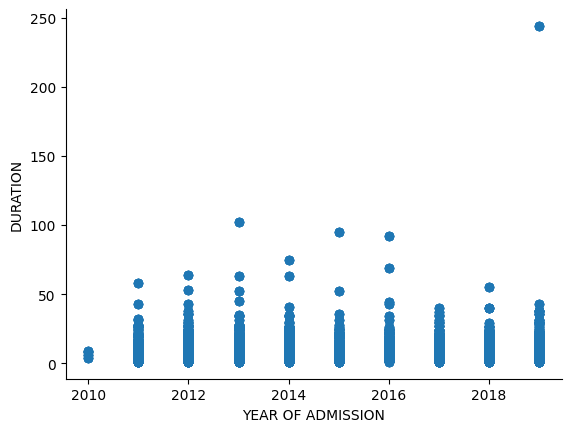

In [24]:
dataset.plot(kind='scatter', x='YEAR OF ADMISSION', y='DURATION', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

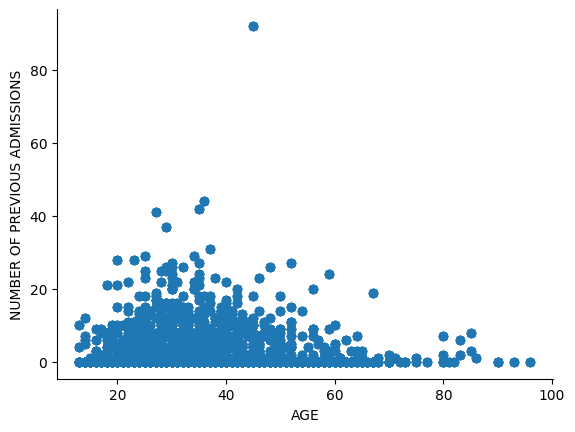

In [25]:
dataset.plot(kind='scatter', x='AGE', y='NUMBER OF PREVIOUS ADMISSIONS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

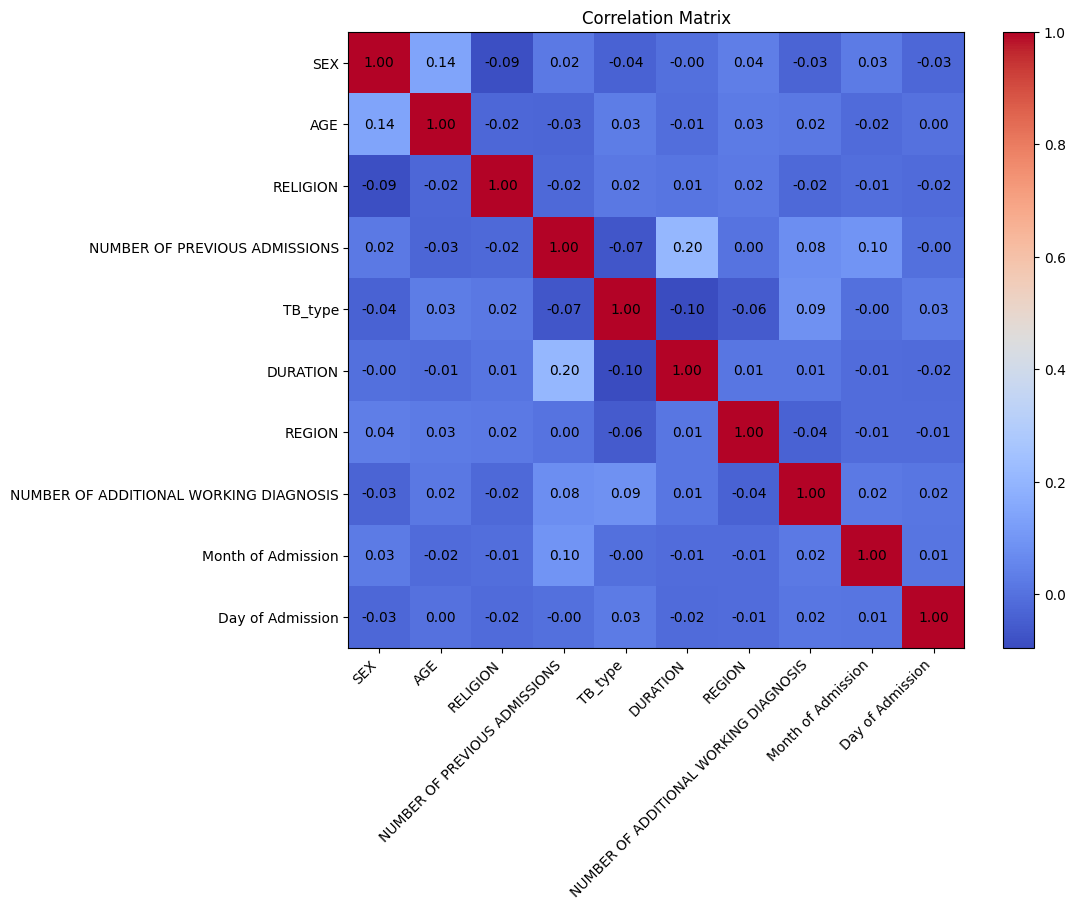

In [26]:
columns = ['SEX', 'AGE', 'RELIGION', 'NUMBER OF PREVIOUS ADMISSIONS', 'TB_type', 'DURATION',
           'REGION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'Month of Admission', 'Day of Admission']
correlation_matrix = dataset[columns].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()

for i in range(len(columns)):
  for j in range(len(columns)):
    plt.text(i, j, "{:.2f}".format(correlation_matrix.iloc[i, j]), ha='center', va='center')

plt.xticks(range(len(columns)), columns, rotation=45, ha='right')
plt.yticks(range(len(columns)), columns)
plt.title('Correlation Matrix')
plt.show()


In [27]:
dataset.head()

,SEX,AGE,RELIGION,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,YEAR OF ADMISSION,DURATION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Week_1,Week_2,Week_3,Week_4,Month of Admission,Day of Admission
0,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
1,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
2,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
3,1,30,1,IMPROVED,5,0,2010,6,0,1,0.0,NaN,NaN,NaN,11,3
4,0,46,1,IMPROVED,3,2,2010,4,0,1,0.0,NaN,NaN,NaN,12,2


In [28]:
dataset['SEX'].unique()

array([1, 0])

In [29]:
dataset['AGE'].unique()

array([30, 46, 80, 22, 18, 24, 57, 37, 29, 25, 33, 32, 50, 36, 19, 43, 34,
       16, 31, 40, 39, 28, 47, 35, 56, 48, 23, 59, 17, 38, 45, 52, 13, 42,
       41, 49, 67, 27, 21, 14, 44, 63, 26, 65, 20, 61, 83, 70, 60, 64, 55,
       62, 54, 58, 85, 53, 15, 86, 51, 75, 73, 72, 68, 77, 93, 82, 66, 81,
       96, 90, 71])

In [30]:
dataset['RELIGION'].unique()

array([1, 2, 0, 4, 3])

In [31]:
dataset['NUMBER OF PREVIOUS ADMISSIONS'].unique()

array([ 5,  3,  7,  8,  4,  2,  6,  1, 10,  9, 13, 14, 11, 20, 27, 17, 12,
       19, 22, 18, 23, 15, 31, 25, 42, 44, 29, 26, 16, 41, 28, 21, 37, 24,
       92,  0])

In [32]:
dataset['TB_type'].unique()

array([0, 2, 4, 3, 1, 5])

In [33]:
dataset['YEAR OF ADMISSION'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [34]:
dataset['REGION'].unique()

array([0, 1, 4, 2, 3])

In [35]:
dataset['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].unique()

array([1, 2, 0, 3, 4, 5])

In [36]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Normalizing and Standardizing continuous features
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'YEAR OF ADMISSION', 'DURATION', 'Month of Admission', 'Day of Admission']
scaler = MinMaxScaler()
dataset[normalise_features] = scaler.fit_transform(dataset[normalise_features])


In [37]:
dataset.head()

,SEX,AGE,RELIGION,OUT COME,NUMBER OF PREVIOUS ADMISSIONS,TB_type,YEAR OF ADMISSION,DURATION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Week_1,Week_2,Week_3,Week_4,Month of Admission,Day of Admission
0,1,0.204819,1,IMPROVED,0.054348,0,0.0,0.020576,0,0.2,0.0,NaN,NaN,NaN,0.909091,0.026667
1,1,0.204819,1,IMPROVED,0.054348,0,0.0,0.020576,0,0.2,0.0,NaN,NaN,NaN,0.909091,0.026667
2,1,0.204819,1,IMPROVED,0.054348,0,0.0,0.020576,0,0.2,0.0,NaN,NaN,NaN,0.909091,0.026667
3,1,0.204819,1,IMPROVED,0.054348,0,0.0,0.020576,0,0.2,0.0,NaN,NaN,NaN,0.909091,0.026667
4,0,0.397590,1,IMPROVED,0.032609,2,0.0,0.012346,0,0.2,0.0,NaN,NaN,NaN,1.000000,0.013333


<h1>Training</h1>

In [38]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
# import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, roc_auc_score

In [39]:
# Separate features and target variables
target_variables = {}
features = {}

for week in range(1, 5):
  week_column = f'Week_{week}'
  filtered_data = dataset[dataset[week_column].notna()]
  target_variables[week] = filtered_data[week_column]
  features[week] = filtered_data.drop(columns=['Week_1', 'Week_2', 'Week_3', 'Week_4', 'OUT COME'])

In [40]:
target_variables[1].shape

(65472,)

In [41]:
features[1].sample(4)

,SEX,AGE,RELIGION,NUMBER OF PREVIOUS ADMISSIONS,TB_type,YEAR OF ADMISSION,DURATION,REGION,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,Month of Admission,Day of Admission
52379,1,0.216867,3,0.086957,3,0.222222,0.032922,0,0.2,1.000000,0.026667
59823,1,0.397590,1,0.010870,2,0.666667,0.008230,0,0.6,0.636364,1.000000
8000,1,0.168675,0,0.000000,4,0.444444,0.032922,0,0.6,0.818182,0.026667
14644,0,0.120482,1,0.000000,4,0.888889,0.000000,0,0.2,0.818182,0.013333


In [42]:
# neural network model for logistic regression
def logistic_regression_model(input_dim):
    inputs = keras.Input(shape=(input_dim,))
    outputs = keras.layers.Dense(1, activation='sigmoid')(inputs)
    model = keras.Model(inputs, outputs)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

accuracy_scores = [] # list to store accuracy for each week
auc_scores = []  # list to store AUC for each week
training_losses = []
validation_losses = []

In [43]:
# Initializing models for each week using a loop
num_weeks = 4
models = []

for week in range(1, 5):
  models.append(logistic_regression_model(input_dim=features[week].shape[1]))


num_epochs = 50
batch_size = 128

In [53]:
# Define time-based split for training and testing (optional)
#tscv = TimeSeriesSplit(n_splits=3, test_size=1)  # Adjust n_splits and test_size as needed
tscv = TimeSeriesSplit(n_splits=4, test_size=150)

for week, target in target_variables.items():
  model = models[week-1]
  for train_index, test_index in tscv.split(features[week]):
    X_train, X_test = features[week].iloc[train_index], features[week].iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]


    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f'Accuracy for Week {week}: {accuracy}')

    auc = roc_auc_score(y_test, y_pred)  # Calculate AUC
    print(f'AUC for Week {week}: {auc}')

    # Store the accuracy and AUC in their respective lists
    accuracy_scores.append(accuracy)
    auc_scores.append(auc)

    # Extracting training and validation loss
    training_losses.append(history.history['loss'])
    validation_losses.append(history.history['val_loss'])


Epoch 1/50
507/507 [==============================] - 2s 4ms/step - loss: 0.3828 - accuracy: 0.8060 - val_loss: 0.2977 - val_accuracy: 0.8667
Epoch 2/50
507/507 [==============================] - 3s 6ms/step - loss: 0.3828 - accuracy: 0.8058 - val_loss: 0.2978 - val_accuracy: 0.8667
Epoch 3/50
507/507 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8057 - val_loss: 0.2979 - val_accuracy: 0.8667
Epoch 4/50
507/507 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8058 - val_loss: 0.2978 - val_accuracy: 0.8667
Epoch 5/50
507/507 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8058 - val_loss: 0.2980 - val_accuracy: 0.8667
Epoch 6/50
507/507 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8056 - val_loss: 0.2980 - val_accuracy: 0.8667
Epoch 7/50
507/507 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8056 - val_loss: 0.2978 - val_accuracy: 0.8667
Epoch 

In [54]:
# printing accuracy
for week, accuracy in enumerate(accuracy_scores):
  print(f"Week {week + 1} Accuracy: {accuracy}")

Week 1 Accuracy: 0.8666666666666667
Week 2 Accuracy: 0.84
Week 3 Accuracy: 0.8666666666666667
Week 4 Accuracy: 0.8666666666666667
Week 5 Accuracy: 0.7866666666666666
Week 6 Accuracy: 0.76
Week 7 Accuracy: 0.8
Week 8 Accuracy: 0.88
Week 9 Accuracy: 0.8933333333333333
Week 10 Accuracy: 0.8933333333333333
Week 11 Accuracy: 0.9466666666666667
Week 12 Accuracy: 0.9466666666666667
Week 13 Accuracy: 0.9733333333333334
Week 14 Accuracy: 1.0
Week 15 Accuracy: 1.0
Week 16 Accuracy: 0.9733333333333334


In [55]:
# Separate loop to print AUC scores
for week, auc in enumerate(auc_scores):
    print(f'AUC for Week {week}: {auc}')

AUC for Week 0: 0.888888888888889
AUC for Week 1: 0.783068783068783
AUC for Week 2: 0.9033816425120773
AUC for Week 3: 0.8646153846153846
AUC for Week 4: 0.8811728395061729
AUC for Week 5: 0.8837876614060258
AUC for Week 6: 0.8905775075987842
AUC for Week 7: 0.9610136452241715
AUC for Week 8: 0.9649122807017544
AUC for Week 9: 0.9922027290448343
AUC for Week 10: 0.9880059970014993
AUC for Week 11: 0.9765395894428153
AUC for Week 12: 1.0
AUC for Week 13: 1.0
AUC for Week 14: 1.0
AUC for Week 15: 0.9915254237288136


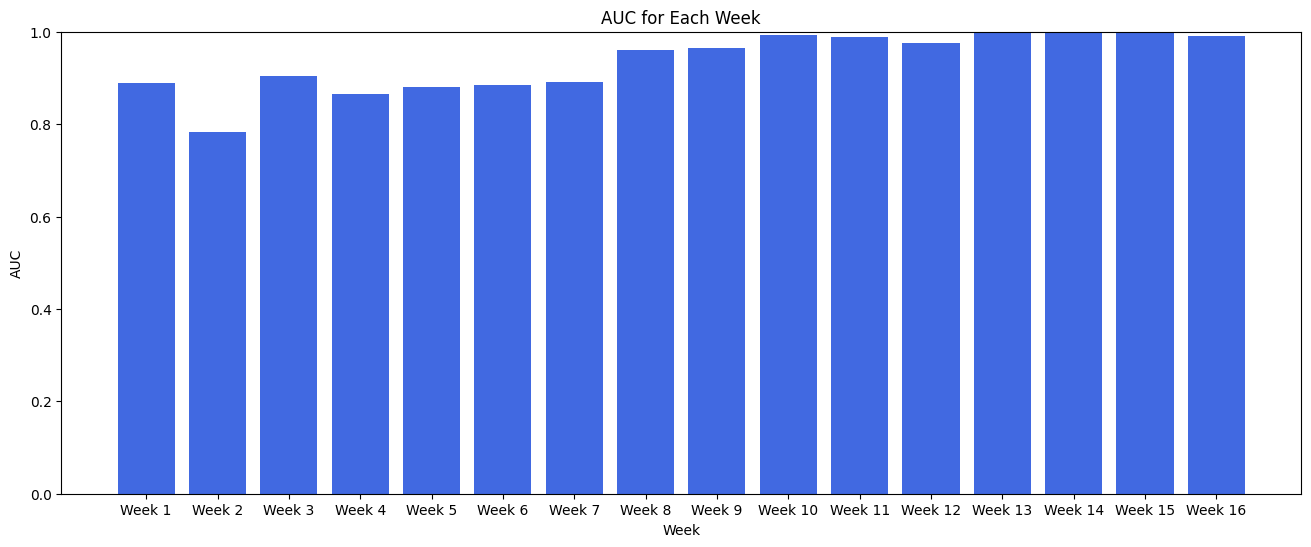

In [60]:
# Create a bar plot to visualize AUC for each week
plt.figure(figsize=(16, 6))
plt.bar(range(16), auc_scores, color='royalblue')
plt.xlabel('Week')
plt.ylabel('AUC')
plt.title('AUC for Each Week')
plt.xticks(range(16), [f'Week {week + 1}' for week in range(16)])
plt.ylim(0, 1.0)  # Set the y-axis limit between 0 and 1
plt.show()

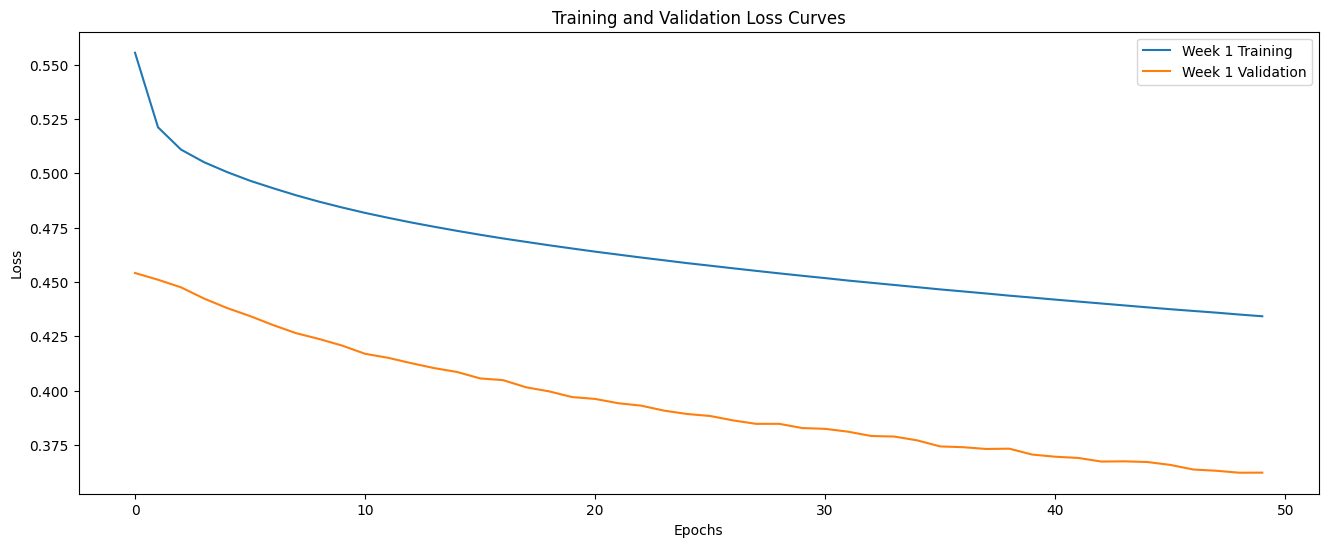

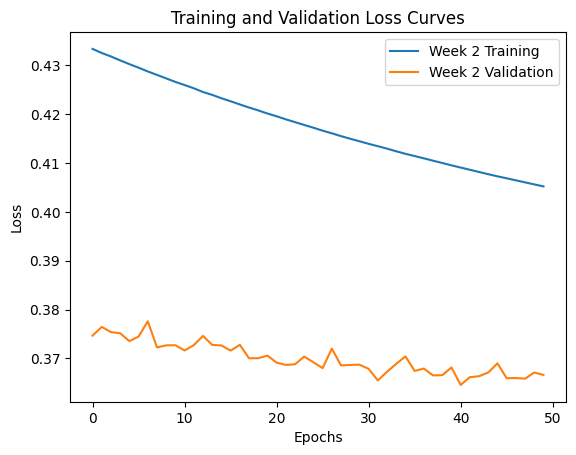

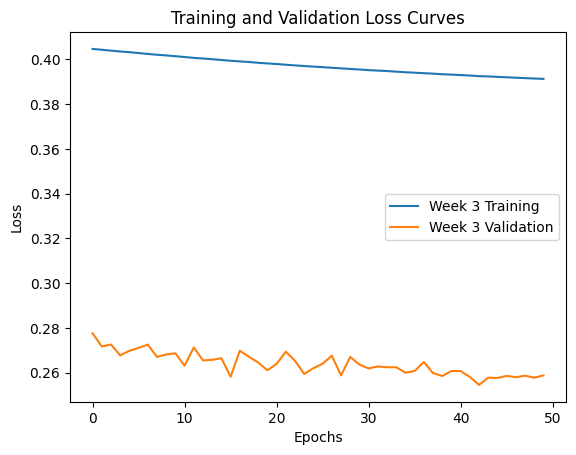

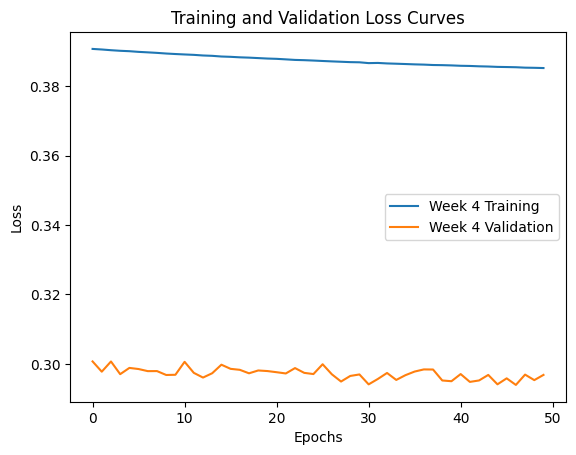

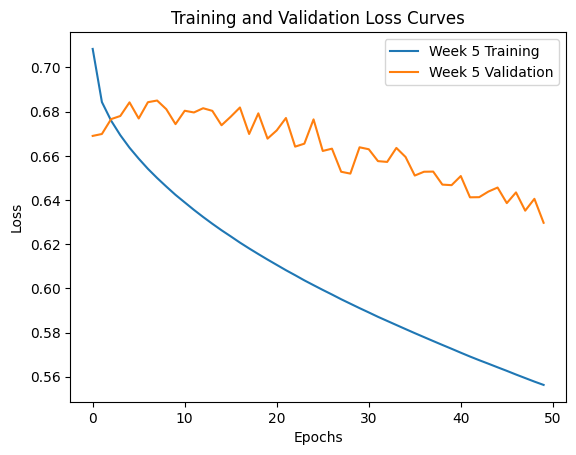

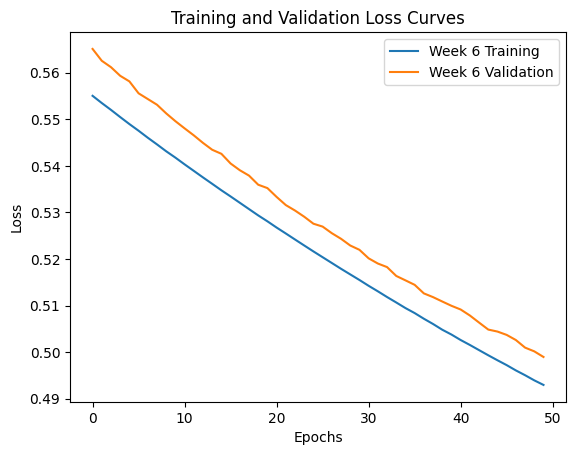

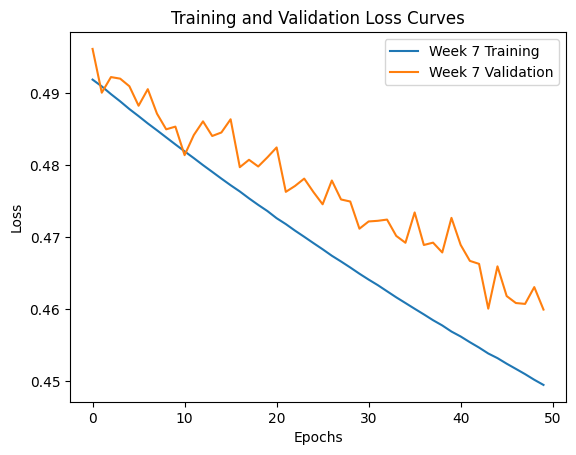

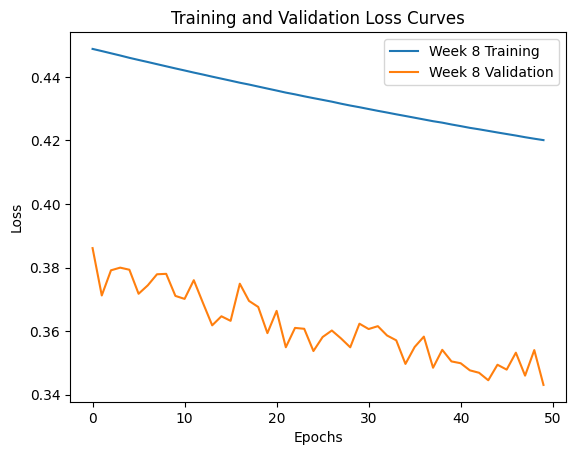

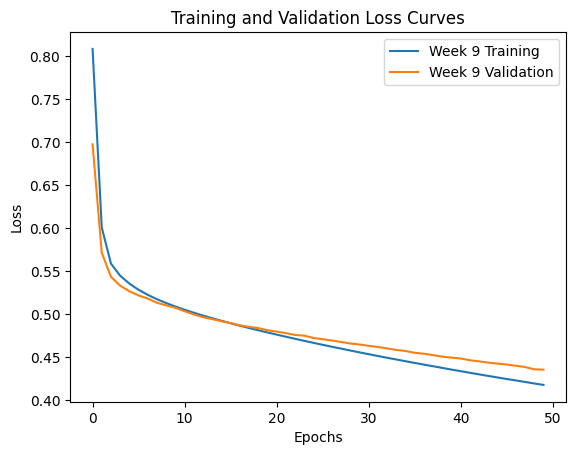

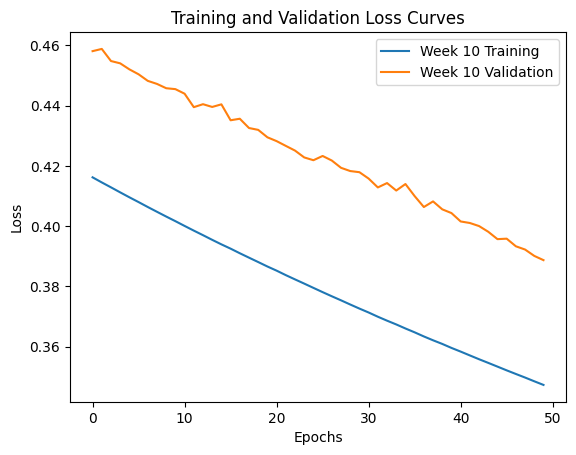

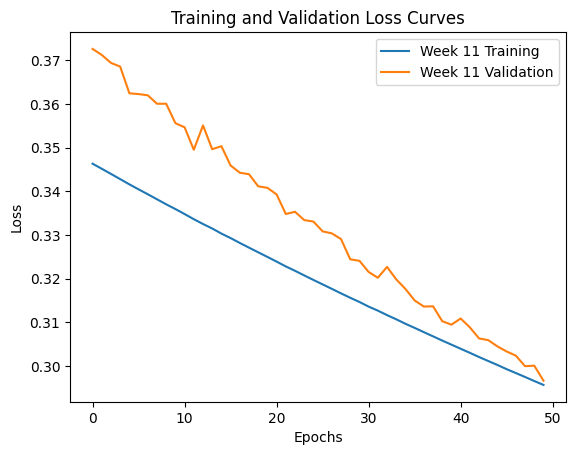

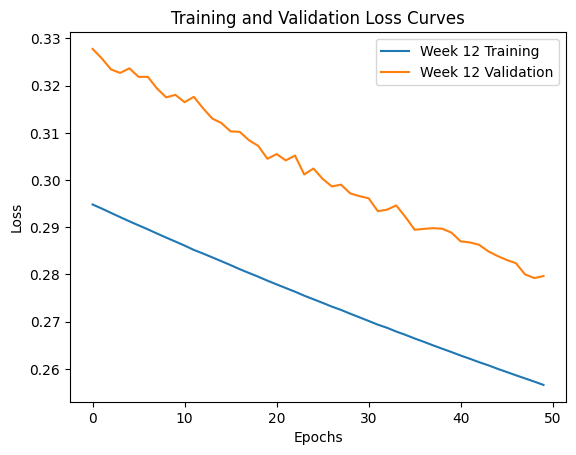

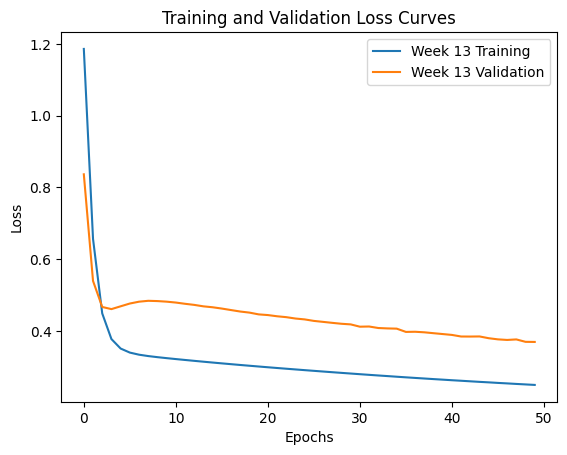

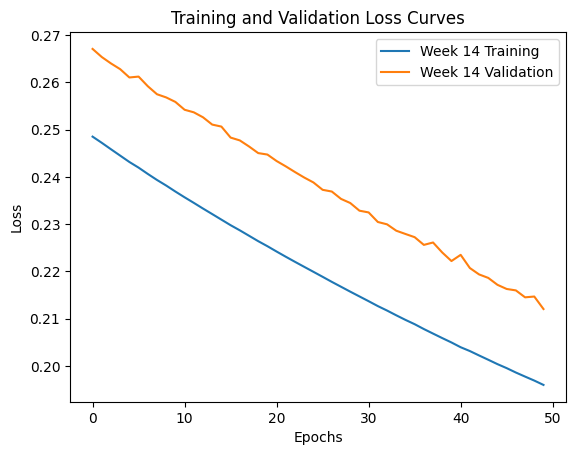

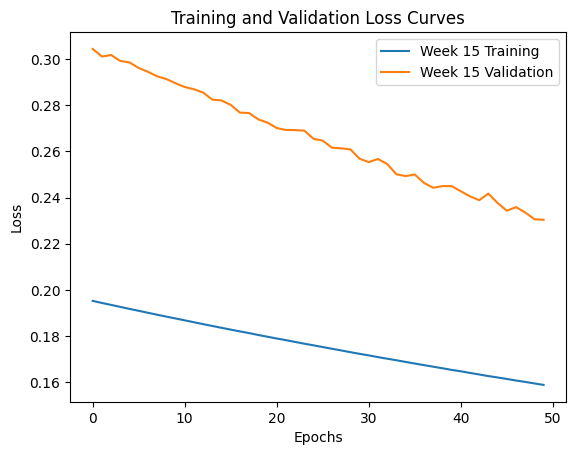

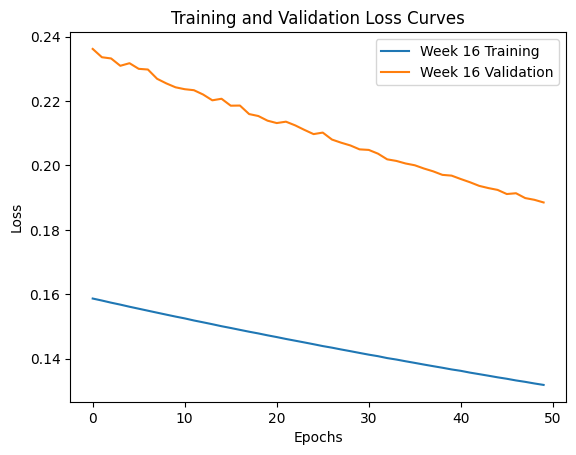

In [61]:
# Plot training and validation loss curves
plt.figure(figsize=(16, 6))
for week in range(16):
    plt.plot(training_losses[week], label=f'Week {week + 1} Training')
    plt.plot(validation_losses[week], label=f'Week {week + 1} Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()
    plt.show()